## CS-E4820 Machine Learning: Advanced Probabilistic Methods (spring 2020)
Pekka Marttinen, Santosh Hiremath, Marko Järvenpää, Tianyu Cui, Yogesh Kumar, Diego Mesquita, Zheyang Shen, Alexander Aushev, Khaoula El Mekkaoui, Joakim Järvinen.

## Assignment 7, due on Tuesday,  17th March at 23:55.


### Contents
1. [Problem 1: ELBO for simple model (1/2)](#Problem-1:-ELBO-for-the-simple-model-(1/2))
2. [Problem 2: ELBO for simple model (2/2) ](#Problem-2:-ELBO-for-the-simple-model-(2/2))
3. [Problem 3: Bayes factors](#Problem-3:-Bayes-factors)
4. [Problem 4: Model selection for GMM with BIC and cross-validation](#Problem-4:-Model-selection-for-GMM-with-BIC-and-cross-validation)


# Problem 1: ELBO for the simple model (1/2)
This problem and the next deal with deriving the ELBO for the ‘simple model’, described in the PDF document 'simple_elbo.pdf'. Before doing these exercises, familiarize yourself with the contents of the document.

**(a)** Show that the general formula for ELBO, shown in Equation (8), can be written as the sum shown in Equation (9) for the simple model.

**(b)** Derive the 2nd term $E_{q(\theta)}[log p(\theta)]$ of the ELBO. (**Hint:** recall that $Var(X)=E(X^2)-E(X)^2$).

**(c)** Find out the formula for the 7th term $E_{q(\theta)[log q(\theta)]}$ of the ELBO. (**Hint:** see the 6th term)





### Solution to Problem 1
Write your solution to Problem 1 in LateX or attach a picture here. You can add a picture using the command ```!(imagename_in_folder.jpg)```. 

**(a)**

$$E_{q}[logp(X,Z)]-E_{q}[logq(Z)]$$
$$= log\;p(x)-KL(q(z)||p(x|x))$$

When we expand Z that for the log likelihood 

$$=E_{q(\tau)}[logp(\tau)] + E_{q(\theta)}[logp(\theta)] + E_{q(z)}E_{q(\tau)}[logp(z|\tau)] + E_{q(z)}E_{q(\theta)}[logp(z|\theta)] - KL(q(z)||p(z|x))$$

This yields the sum of log likelihood of the data minus the KL divergence between the variational distribution q(z) and p(z). Expanding Z that for the KL divergence gives the equation (9) in the slides

$$=E_{q(\tau)}[logp(\tau)] + E_{q(\theta)}[logp(\theta)] + E_{q(z)}E_{q(\tau)}[logp(z|\tau)] + E_{q(z)}E_{q(\theta)}[logp(z|\theta)] - E_{q(z)}[logq(z)] - E_{q(\tau)}[logq(\tau)] -E_{q(\theta)}[logq(\theta)]$$

**(b)**

We have $p(\theta)=N(\theta|\beta_{0}^{-1})\propto e{-\frac{\beta_{0}}{2}\theta^{2}}$ Therefore we can write

$$ E_{q(\theta)}[logp(\theta)] = E_{q(\theta)}[e^{-\frac{\beta_{0}}{2}\theta^{2}}]$$

Taking logarithm yields

$$ = E_{q(\theta)}[-\frac{\beta_{0}}{2}\theta^{2}ln(e)]$$

$$ -\frac{\beta_{0}}{2}E_{q(\theta)}\theta^{2} = -\frac{\beta_{0}}{2}(\beta_{2}^{-1}+m_{2}^{2})$$


**(c)**

We have $q(\theta) = N(\theta|m_{2},\beta_{2}^{-1})$

Therefore we know that $E_{q(\theta)}[logq(\theta)]$ is just the negative entropy of the normal distribution which gives

$$ = -\frac{1}{2}log(2\pi e\sigma^2)$$

# Problem 2: ELBO for the simple model (2/2)

**(a)** Derive the 4th term $ E_{q(z)q(\theta)}\left[\log p(x \mid z, \theta)\right]$ of the ELBO. 

**Hint 1**: $E(XY) = E(X)E(Y)$ if X and Y are assumed indendent (see how this is already used in the derivation of term 3). 

**Hint 2**: $E(X-Y) = E(X - a + a - Y)^2$.

**(b)** Implement terms 2, 4, and 7 in the code template given below. Verify that the ELBO increases when you run the VB algorithm.

### Solution to Problem 2(a)
Write your solution to problem 2(a) in LateX or attach a picture here. You can add a picture using the command ```!(imagename_in_folder.jpg)```.


**(a)**

$$E_{q(z)q(\theta)}[logp(x[z,\theta])$$

$$ = \frac{N}{2}log(2\pi)-\frac{1}{2}\sum_{n=1}^{N}r_{n1}x_{n}^{2}-\frac{1}{2}\sum_{n=1}^{N}r_{n2}[(x_{n}-m_{2})^{2}-\beta_{2}^{-1}]$$

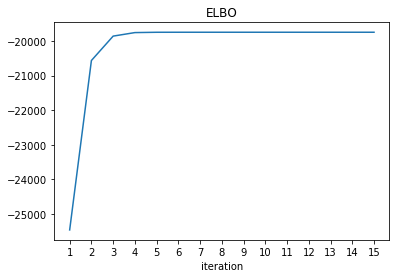

In [7]:
# Template for problem 2(b). 
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123123123)

# Compute ELBO for the model described in simple_elbo.pdf
def compute_elbo(alpha_tau, beta_tau, r1, r2, m2, beta2, alpha0, beta0, x):
    
    from scipy.special import psi, gammaln # digamma function, logarithm of gamma function
    
    # E[log p(tau)]
    term1 = (alpha0 - 1) * (psi(alpha_tau) + psi(beta_tau) - 2 * psi(alpha_tau + beta_tau))

    # E[log p(theta)]
    # term2 = ?
    
    # YOUR CODE HERE
    try:
        term2 = psi(-beta0/2*(1/beta2+m2))
    except:
        raise NotImplementedError()

    # E[log p(z|tau)]
    N2 = np.sum(r2); N1 = np.sum(r1); N = N1 + N2
    term3 = N2 * psi(alpha_tau) + N1 * psi(beta_tau) - N * psi(alpha_tau + beta_tau)

    # E[log p(x|z,theta)]
    # term4 = ?
    
    # YOUR CODE HERE
    try:
        term4 = -N/2*np.log(2*np.pi) - 1/2*np.sum(r1*x**2) - 1/2*np.sum(r2*((x-m2)**2+1/beta2))
    except:
        raise NotImplementedError()
    

    # Negative entropy of q(z)
    term5 = np.sum(r1 * np.log(r1)) + np.sum(r2 * np.log(r2))

    # Negative entropy of q(tau)
    term6 = (gammaln(alpha_tau + beta_tau) - gammaln(alpha_tau) - gammaln(beta_tau)
        + (alpha_tau - 1) * psi(alpha_tau) + (beta_tau - 1) * psi(beta_tau)
        - (alpha_tau + beta_tau - 2) * psi(alpha_tau + beta_tau))

    # Negative entropy of q(theta)
    # term7 = ?
    
    # YOUR CODE HERE
    try:
        import math
        term7 = -1/2*np.log(2*np.pi*math.exp(1)*1/beta0)
    except:
        raise NotImplementedError()

    elbo = term1 + term2 + term3 + term4 - term5 - term6 - term7
    
    return elbo


# Simulate data
theta_true = 4
tau_true = 0.3
n_samples = 10000
z = (np.random.rand(n_samples) < tau_true)  # True with probability tau_true
x = np.random.randn(n_samples) + z * theta_true

# Parameters of the prior distributions.
alpha0 = 0.5
beta0 = 0.2

n_iter = 15 # The number of iterations
elbo_array = np.zeros(n_iter) # To track the elbo

# Some initial value for the things that will be updated
E_log_tau = -0.7   # E(log(tau))
E_log_tau_c = -0.7  # E(log(1-tau))
E_log_var = 4 * np.ones(n_samples)  # E((x_n-theta)^2)
r2 = 0.5 * np.ones(n_samples)  # Responsibilities of the second cluster.

for i in range(n_iter):
    
    # Updated of responsibilites, factor q(z)
    log_rho1 = E_log_tau_c - 0.5 * np.log(2 * np.pi) - 0.5 * (x ** 2)
    log_rho2 = E_log_tau - 0.5 * np.log(2 * np.pi) - 0.5 * E_log_var
    max_log_rho = np.maximum(log_rho1, log_rho2)  # Normalize to avoid numerical problems when exponentiating.
    rho1 = np.exp(log_rho1 - max_log_rho)
    rho2 = np.exp(log_rho2 - max_log_rho)
    r2 = rho2 / (rho1 + rho2)
    r1 = 1 - r2
    
    N1 = np.sum(r1)
    N2 = np.sum(r2)
    
    # Update of factor q(tau)
    from scipy.special import psi # digamma function
    E_log_tau = psi(N2 + alpha0) - psi(N1 + N2 + 2*alpha0)
    E_log_tau_c = psi(N1 + alpha0) - psi(N1 + N2 + 2*alpha0)
    
    # Update of factor q(theta)
    x2_avg = 1 / N2 * np.sum(r2 * x)
    beta_2 = beta0 + N2
    m2 = 1 / beta_2 * N2 * x2_avg
    E_log_var = (x - m2) ** 2 + 1 / beta_2
    
    # Keep track of the current estimates
    tau_est = (N2 + alpha0) / (N1 + N2 + 2*alpha0)
    theta_est = m2
    
    # Compute ELBO
    alpha_tau = N2 + alpha0
    beta_tau = N1 + alpha0
    elbo_array[i] = compute_elbo(alpha_tau, beta_tau, r1, r2, m2, beta_2, alpha0, beta0, x)

# Plot ELBO as a function of iteration
plt.plot(np.arange(n_iter) + 1, elbo_array)
plt.xticks(np.arange(n_iter) + 1)
plt.xlabel("iteration")
plt.title("ELBO")
plt.show()

# Problem 3: Bayes factors
Suppose we have two bags, each containing a large number of black and white marbles. To learn about the contents of the bags, we have done 5 draws from each bag. After each draw, the marble drawn has been returned to the bag. The draws from the first bag are as follows ( B, W, W, B, B ) and the draws from the second bag are ( B, B, B, B, W ) , where B corresponds to a Black marble and W to a White marble. 

Consider two models:

- $M_1$ : the proportions of marbles are the same in the two bags

- $M_2$ : the proportions of marbles are different in the two bags.

**(a)** Write out the two models explicitly. Assuming that a priori all proportions are equally probable, compute the Bayes factor in favor of $M_1$.

**(b)** The same as (a), but now the first set of draws contains 300 black and 200 white draws,
and second set of draws 250 black and 250 white draws.

**Hint**: Beta distribution is the conjugate prior for the Binomial/Bernoulli likelihood, and a uniform proportion corresponds to the $Beta( 1, 1)$ distribution.





### Solution to Problem 3
Write your solution to Problem 3 in LateX or attach a picture here. You can add a picture using the command ```!(imagename_in_folder.jpg)```. 

**(a)** 

When the proportion of the marbles are the same we can write:

$$p(\theta|M_{same}) = Beta(\theta|a,b)$$

$$ = B(a,b)^{-1}\theta^{a-1}(1-\theta)^{b-1}$$

Given that the proportion of the marbles are the same, then the probability of drawing a black marble in N draws is given by

$$M_{1}: p(x|M_{same}) = \int p(x|\theta, M_{same})p(\theta|M_{same})d\theta$$

$$= \binom{N}{Black}B(a,b)^{-1}\int\theta^{Black}(1-\theta)^{N-Black}\theta^{a-1}(1-\theta){b-1}d\theta$$

$$= \binom{N}{Black}B(a,b)^{-1}\int\theta^{Black+a-1}(1-\theta)^{N-Black+b-1}d\theta$$

$$= \binom{N}{Black}B(a,b)^{-1}B(Black+a, N-Black+b)$$

Where drawing three black marbles equals to 

$$= \binom{5}{3}B(50,50)^{-1}B(53, 52)$$

And drawing four black marbles equals to

$$= \binom{5}{4}B(50,50)^{-1}B(54, 51)$$

When the proportion of the marbles are different we can write:

$$ p(\theta|M_{different}) = 0.5 \times Beta(\theta|3,10)+0.5\times Beta(\theta|3,10)$$

Given that the proportion of the marbles are different, then the probability of drawing a black marble in N draws is given by

$$\frac{1}{2}\binom{N}{Black}\Bigg\{\frac{B(Black+3, N-Black+10)}{B(3,10)}+\frac{B(Black+10,N-Black+3)}{B(10,3)}\Bigg\}$$

Where drawing three black marbles equals to 

$$\frac{1}{2}\binom{5}{3}\Bigg\{\frac{B(6,12)}{B(3,10)}+\frac{B(13,5)}{B(10,3)}\Bigg\}$$

And drawing four black marbles equals to

$$\frac{1}{2}\binom{5}{4}\Bigg\{\frac{B(7,11)}{B(3,10)}+\frac{B(14,4)}{B(10,3)}\Bigg\}$$


Therefore Byes factor $m_{1}/m_{2}$ when three black marbles

$$\frac{= \binom{5}{3}B(50,50)^{-1}B(53, 52)}{\frac{1}{2}\binom{5}{3}\Bigg\{\frac{B(6,12)}{B(3,10)}+\frac{B(13,5)}{B(10,3)}\Bigg\}} = 2.0278 .. $$


Therefore Byes factor $m_{1}/m_{2}$ when four black marbles

$$\frac{\binom{5}{4}B(50,50)^{-1}B(54, 51)}{\frac{1}{2}\binom{5}{4}\Bigg\{\frac{B(7,11)}{B(3,10)}+\frac{B(14,4)}{B(10,3)}\Bigg\}} = 0.8585 .. $$

**(b)**

Given that the proportion of the marbles are the same and given that the first set of draws contains 300 black and 200 white marbles, then the probability of drawing 300 black marbles equals to


$$= \binom{500}{300}B(50,50)^{-1}B(350, 250)$$

and given that the second set of draws contains 250 black and 250 white marbles, then the probability of drawing 250 black marbles equals to

$$= \binom{500}{250}B(50,50)^{-1}B(300, 300)$$

Given that the proportion of the marbles are different and given that the first set of draws contains 300 black and 200 white marbles, then the probability of drawing 300 black marbles equals to

$$\frac{1}{2}\binom{500}{300}\Bigg\{\frac{B(303,210)}{B(3,10)}+\frac{B(310,203)}{B(10,3)}\Bigg\}$$

and given that the second set of draws contains 250 black and 250 white marbles, then the probability of drawing 250 black marbles equals to

$$\frac{1}{2}\binom{500}{250}\Bigg\{\frac{B(253,260)}{B(3,10)}+\frac{B(260,247)}{B(10,3)}\Bigg\}$$

Therefore Byes factor $m_{1}/m_{2}$ when 300 black marbles

$$\frac{\binom{500}{300}B(50,50)^{-1}B(350, 250)}{\frac{1}{2}\binom{500}{300}\Bigg\{\frac{B(303,210)}{B(3,10)}+\frac{B(310,203)}{B(10,3)}\Bigg\}} = 2.4196..$$



Therefore Byes factor $m_{1}/m_{2}$ when 250 black marbles

$$\frac{\binom{500}{250}B(50,50)^{-1}B(300, 300)}{\frac{1}{2}\binom{500}{250}\Bigg\{\frac{B(253,260)}{B(3,10)}+\frac{B(260,247)}{B(10,3)}\Bigg\}} = 0.5921..$$

# Problem 4: Model selection for GMM with BIC and cross validation

In many machine learning applications model selection is crucial. In this exercise, you
will practice two common approaches for model selection: 

- Bayesian Information Criterion (BIC) (as an approximation to ‘Bayesian model selection’) and  

- Cross-Validation (as a representative for a predictive model selection criterion).

You are given a data set (1000 samples of dimension 2) contained in the file data.pickle, which has been sampled from a Gaussian Mixture Model (GMM) using three classes(the true class labels are given for your convenience, but they should not be used in learning the model).

In the given code template below, the data will be divided into training and test sets.

**(a)** Complete the functions 'compute_bic' and 'cross_validate'. Use both criteria to select the number of components in the GMM using the training data. Plot the both the BIC and the validation log-likelihoods as a function of the number of components, as well as the data with the best model. Do both methods find a model with three components as the most likely?

**(b)** Use the selected models to evaluate the test set log-likelihood.

**(c)** Explain briefly the pros and cons of the two approaches and comment which approach you would consider better and why.

**Hint**: What is the total number of parameters needed to specify the component
means and covariance matrices, and the mixture weights? You will need this
number to compute BIC.

In [2]:
# This Starter code for problem 4. The solution template is in the cell below.
# Tools for learning Gaussian mixture models; adapted from the BRMLtoolkit by David Barber.
import numpy as np
import numpy.matlib as matlib
import numpy.linalg as LA
#import scipy.misc
from scipy.special import logsumexp

def condp(X):
    return X / np.sum(X, axis=0)

def condexp(logp):
    pmax = np.max(logp, axis=0)
    P = logp.shape[0]
    return condp(np.exp(logp - np.tile(pmax, (P, 1))))

def GMMlogp(X, H, P, m, S):
    D, N = X.shape  # dimension and number of points

    logp = np.zeros((N, H))
    for i in range(H):
        invSi = LA.inv(S[i,:,:])
        sign, logdetSi = LA.slogdet(2 * np.pi * S[i,:,:])

        for n in range(N):
            v = X[:,n] - m[:,i]
            logp[n,i] = -0.5 * (v @ invSi @ v) - 0.5 * logdetSi + np.log(P[i])

    return logp



# Log Likelihood of data X under a Gaussian Mixture Model
#
# X : each column of X is a datapoint.
# P : mixture coefficients
# m : means
# S : covariances
#
# Returns: A list containing the log likelihood for each data point in X
def GMMloglik(X, P, m, S):
    N = X.shape[1]
    H = m.shape[1]

    logp = GMMlogp(X, H, P, m, S)
    logl = [logsumexp(a=logp[n,:], b=np.ones(H)) for n in range(N)]

    return logl

# Fit a mixture of Gaussian to the data X using EM
#
# X : each column of X is a datapoint.
# H : number of components of the mixture.
# n_iter : number of EM iterations
#
# Returns: (P, m, S, loglik, phgn)
# P : learned mixture coefficients
# m : learned means
# S : learned covariances
# loglik : log likelihood of the learned model
# phgn : mixture assignment probabilities
def GMMem(X, H, n_iter):
    D, N = X.shape  # dimension and number of points

    # initialise the centres to random datapoints
    r = np.random.permutation(N)
    m = X[:, r[:H]]

    # initialise the variances to be large
    s2 = np.mean(np.diag(np.cov(X)))
    S = matlib.tile(s2 * np.eye(D), [H, 1, 1])

    # intialise the component probilities to be uniform
    P = np.ones(H) / H

    for emloop in range(n_iter):
        # E-step:
        logpold = GMMlogp(X, H, P, m, S)

        phgn = condexp(logpold.T)  # responsibilities
        pngh = condp(phgn.T)       # membership

        # M-step:
        for i in range(H):   # now get the new parameters for each component
            tmp = (X - np.tile(m[:,i:i+1], N)) * np.tile(np.sqrt(pngh[:,i]), (D,1))
            Scand = np.dot(tmp, tmp.T)

            if LA.det(Scand) > 0.0001:   # don't accept too low determinant
                S[i,:,:] = Scand

        m = np.dot(X, pngh)
        P = np.sum(phgn, axis=1) / N

    logl = np.sum(logsumexp(a=logpold[n,:], b=np.ones(H)) for n in range(N))

    return P, m, S, logl, phgn

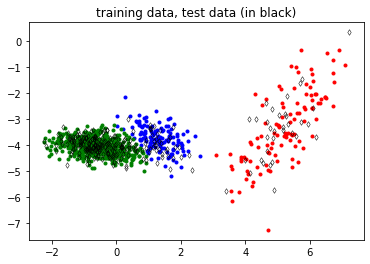

computing cross validation score
H: 1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


H: 2
H: 3
H: 4
H: 5


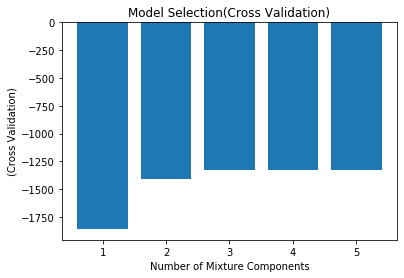

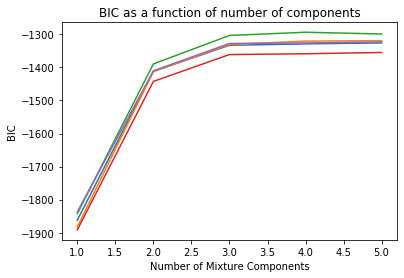

Test Data Likelihood = -532.016890


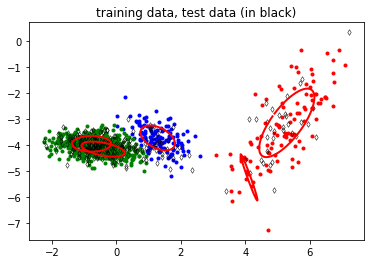

In [3]:
# Template for problem 4
import matplotlib.pyplot as plt
import pickle

np.random.seed(0)
totalComponents = 5  # max number of mixture components
criterion_flag = 0    # 0: cross validation, 1: BIC

def compute_bic(Xtrain):
    BICs = []
    for H in range(1, totalComponents+1):    # number of mixture components
        print("H: {}".format(H))

        P, m, S, loglik, phgn = GMMem(Xtrain, H, 100)  # fit to data

        # numParams = ?     # number of parameters in the model
        # BIC = ?           # BIC for the model
        
        # YOUR CODE HERE
        try:
            numParams = H * ndim*(ndim+1)/2 + H*ndim + (H-1)
            BIC = loglik-numParams/2*np.log(Xtrain.shape[0])
        except:
            raise NotImplementedError()
        BICs.append(BIC)
    return BICs

def cross_validate(Xtrain):
    foldCount = 5    # number of folds

    loglik = np.zeros((totalComponents, foldCount))

    Nlearning = Xtrain.shape[1]
    order = np.random.permutation(Nlearning)    # to randomize the sample order

    for H in range(1, totalComponents+1):     # number of mixture components
        print("H: {}".format(H))

        for fold in range(foldCount):    # K-fold cross validation (K=5)
            ind = fold * int(Nlearning/foldCount) + np.arange(int(Nlearning/foldCount))
            val_indices = order[ind]

            training_indices = np.setdiff1d(np.arange(Nlearning), val_indices);

            X_train = Xtrain[:,training_indices]  # cv training data
            X_val   = Xtrain[:,val_indices]       # cv validation data

            # train model
            P1, m1, S1, loglik1, phgn1 = GMMem(X_train, H, 100)   # fit model

            # Predict using the cv trained model
            # logl1 = ?
            # loglik[H-1,fold] = ?
            
            # YOUR CODE HERE
            try:
                logl1 = GMMloglik(X_train,P1,m1,S1)
                loglik[H-1,fold] = np.sum(logl1) 
            except:
                raise NotImplementedError()
    return loglik
    
# load data
with open("/coursedata/data.pickle", "rb") as f:
    X, labels = pickle.load(f)

D, N = X.shape   # dimension and number of data points

ratio = 0.75
train_ind = np.random.choice(N, int(ratio * N), replace=False)   # training data index
test_ind = np.setdiff1d(np.arange(N), train_ind)                 # test data index

Xtrain = X[:,train_ind]            # training data
Xtrain_labels = labels[train_ind]  # training data labels

Xtest = X[:,test_ind]            # test data
Xtest_labels = labels[test_ind]  # test data labels

# plot training and test data
def plot_data():
    for i in sorted(set(Xtrain_labels)):
        X_comp = Xtrain[:, Xtrain_labels == i]
        plt.plot(X_comp[0], X_comp[1], '.' + 'brgmcyk'[i-1], markersize=6)

    plt.plot(Xtest[0], Xtest[1], 'kd', markersize=4, markeredgewidth=0.5, markerfacecolor="None")

plot_data()
plt.title('training data, test data (in black)')
plt.show()



# ***** Use BIC to select the number of components
# (Only this part differs from the second template, where cross validation is used instead)

if criterion_flag:
    print('computing BIC')
    scores = compute_bic(Xtrain)
    ylabel = "(BIC)"
elif not criterion_flag:
    print('computing cross validation score')
    scores = cross_validate(Xtrain)
    ylabel = "(Cross Validation)"

# plot the BIC curve
plt.bar(np.arange(1, totalComponents+1), np.mean(scores, axis=1))
#plt.yscale("log", nonposy="clip")
plt.xlabel('Number of Mixture Components')
plt.ylabel(ylabel)
plt.title('Model Selection' + ylabel )
plt.show()

plt.plot(range(1,totalComponents+1), scores)
plt.title('BIC as a function of number of components')
plt.ylabel('BIC')
plt.xlabel('Number of Mixture Components')
plt.show()

# select the number of mixture components which minimizes the BIC
h = np.argmax(np.mean(scores, axis=1)) + 1



# ***** TRAIN

# Now train full model with selected number of mixture components
P, m, S, loglik, phgn = GMMem(Xtrain, h, 100)  # fit to data

# Predict using the full trained model (Use GMMem.GMMloglik)
# logl = ?
# print('Test Data Likelihood = {0:f}'.format(?))

# YOUR CODE HERE
try:
    logl = GMMloglik(Xtest,P,m,S);
    print('Test Data Likelihood = {0:f}'.format(np.sum(logl)))
except:
    raise NotImplementedError()
    

# Plot the best GMM model
plot_data()

for i in range(h):
    dV, E = LA.eig(S[i,:,:])

    theta = np.arange(0, 2*np.pi, 0.1)
    p = np.sqrt(dV.reshape(D,1)) * [np.cos(theta), np.sin(theta)]
    x = (E @ p) + np.tile(m[:,i:i+1], (1, len(theta)))

    plt.plot(x[0], x[1], 'r-', linewidth=2)

plt.title('training data, test data (in black)')
plt.show()

According to the results, both models find three components as most likely solution because adding more components on top of the three components does not improve the likelihood significantly. 

|  | **CV** | **BIC**
| :--: | :--: | :---:
| **Pros** |  | 
||Simple to compute and easy to understand|BIC is consistent and with enough data it ay very well find the true underlaying model
||No penalty for model complexity -> allows to have more complex models|
| **Cons** | | 
||Sensitive to the partitioning used -> no consistency quarantees|May be sensitive to the prior on the parameters
||Gets computationally heavy quite quickly with increasing holdout sets and data|Heavy penalty on complexity -> may produce too sparse models for prediction -> underfitting
||Generally not suitable for time-series data as it has intrisic ordere and shuffeling the data would "brake" the order/patterns in the data|

Whether CV is superioir to BIC or vice versa is not a trivial thing to answer. In my opinion, this depends largely on the problem setting e.g. how much data you have on hand, what kind of data it is and what is it that the model tries to solve etc. However, whenever possible, I would probably go woth CV due to its simplicity.